In [78]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [17]:
data = pd.read_csv('data/spotify_dataset.csv', sep=';')

In [19]:
genres = data['track_genres']

In [20]:
ast.literal_eval(genres[0])

['canadian contemporary r&b',
 'canadian pop',
 'dance pop',
 'electropop',
 'pop',
 'pop dance',
 'post-teen pop']

In [21]:
L = []
for i in range(len(genres)):
    L += ast.literal_eval(genres.iloc[i])

In [22]:
items,counts = np.unique(L,return_counts=True)

In [ ]:
s = pd.Series(counts, index = items).sort_values(ascending=False)
s.head(50)

In [74]:
s[s>=50]

rock                 1211
pop                  1147
latin                1034
edm                  1005
rap                   938
                     ... 
deep groove house      52
merengue               52
vapor soul             51
glam rock              50
spanish pop            50
Length: 123, dtype: int64

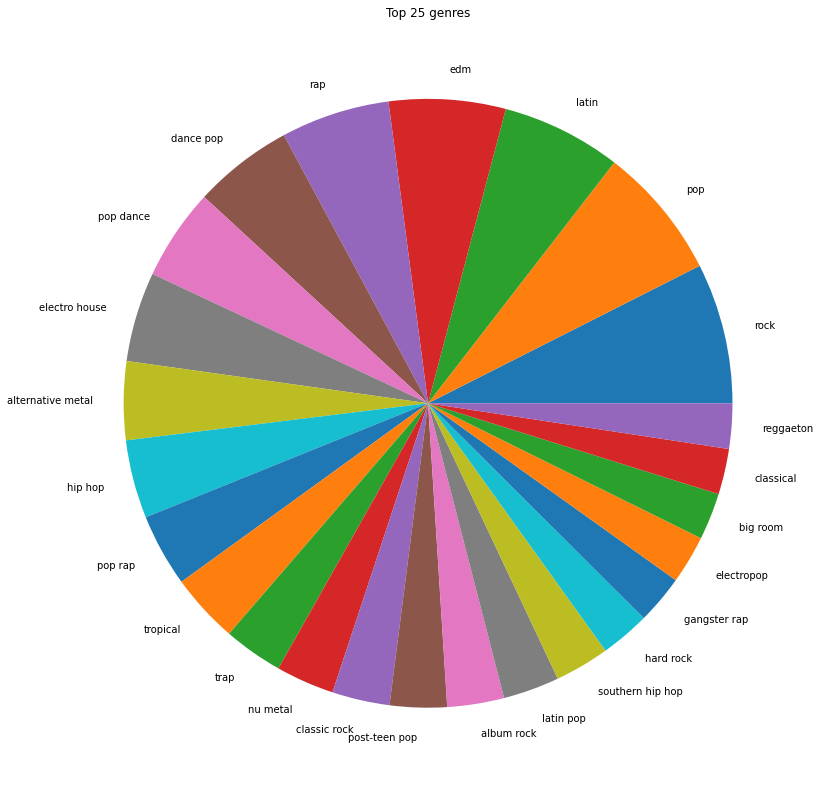

In [65]:
s.iloc[:25].plot(figsize=(14,14), kind='pie', title='Top 25 genres', ylabel='')
plt.show()

In [48]:
pd.DataFrame.plot?

In [50]:
data.size

115349

In [53]:
data.iloc[0,:10].size

10

In [79]:
metric = np.load('metric/ground_metric.npy')
genre_index = joblib.load('metric/genre_index.dict')
index_genre = joblib.load('metric/index_genre.dict')

In [77]:
metric.shape

(5107, 5107)

In [85]:
g = list(s.index)


In [112]:
new_metric[0]

array([0.000e+00, 1.000e+00, 3.440e+02, 7.820e+02, 9.690e+02, 2.000e+00,
       1.547e+03, 9.560e+02, 2.722e+03, 9.590e+02, 8.000e+00, 7.060e+02,
       8.030e+02, 2.604e+03, 1.000e+01, 3.000e+00, 4.036e+03, 6.100e+01,
       2.700e+01, 2.670e+03, 1.410e+02, 5.000e+00, 1.767e+03, 3.806e+03,
       2.214e+03, 1.700e+01, 8.430e+02, 3.624e+03, 1.258e+03, 1.977e+03,
       2.572e+03, 2.088e+03, 2.027e+03, 2.148e+03, 1.866e+03, 2.726e+03,
       1.526e+03, 4.700e+01, 3.218e+03, 4.760e+02, 1.710e+03, 2.480e+03,
       3.700e+02, 4.900e+01, 2.800e+03, 1.569e+03, 5.160e+02, 6.580e+02,
       2.656e+03, 2.586e+03, 5.300e+01, 2.500e+01, 1.200e+01, 1.040e+03,
       2.280e+02, 3.024e+03, 7.030e+02, 1.862e+03, 1.822e+03, 1.130e+02,
       1.891e+03, 6.440e+02, 1.115e+03, 4.860e+02, 1.310e+02, 2.894e+03,
       1.130e+03, 1.756e+03, 9.100e+01, 2.758e+03, 1.784e+03, 3.928e+03,
       2.630e+02, 5.680e+02, 3.560e+02, 1.663e+03, 3.666e+03, 4.000e+00,
       2.150e+03, 1.426e+03, 9.000e+00, 1.076e+03, 

In [126]:
def reduce_metric(genres, metric, genre_index, reset_distance=False):
    """
    Args:
        genres (list) : the list of the genres we want to consider
        metric (matrix) : the matrix 
    """
    idx = [genre_index[i] for i in genres]
    new_metric = metric[idx][:,idx]
    if reset_distance:
        new_metric = np.array([new_metric[i].argsort() for i in range(len(new_metric))],dtype=np.float16)
    return new_metric

In [127]:
new_metric = reduce_metric(g, metric, genre_index, reset_distance=True)

In [128]:
new_metric

array([[  0.,   1.,   5., ..., 110., 877., 471.],
       [  1.,   0.,   5., ..., 110., 877., 471.],
       [  2.,  60.,  17., ..., 877., 110., 471.],
       ...,
       [928., 771., 740., ..., 459., 877., 471.],
       [929.,  68., 101., ..., 110., 877., 471.],
       [930., 655., 544., ..., 434., 877., 471.]], dtype=float16)